In [3]:
#%run alara_full_mats_faster.ipynb

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import nurk as nurk
from nurk import pos_resolution, resolution_lines

In [2]:
with open('output_data.pkl', 'rb') as f:
    event_points_all_df = pickle.load(f)

In [1]:
colis = [i for i in range(0,6)]
event_points_all_df['position resolution'] = event_points_all_df.apply(lambda row: pos_resolution(row[colis], row['resolution lines']), axis=1)

NameError: name 'event_points_all_df' is not defined

In [ ]:
# all mats together by x or y projection
vert_x=[[],[],[]]
vert_y=[[],[],[]]
pos_res_x=[[],[],[]]
pos_res_y=[[],[],[]]
# vert_x=[]
# vert_y=[]
# pos_res_x=[]
# pos_res_y=[]
for index, value in event_points_all_df['position resolution'].items():
    x=[value[0],value[2],value[4]]
    y=[value[1],value[3],value[5]]
    for ind, (xi, yi) in enumerate(zip(x, y)):
        if not np.isnan(xi):
            pos_res_x[ind].append(xi)
            vert_x[ind].append(abs(event_points_all_df['vert3_o_2Dx'][index]))
        if not np.isnan(yi):
            pos_res_y[ind].append(yi)
            vert_y[ind].append(abs(event_points_all_df['vert3_o_2Dy'][index]))

In [ ]:

# plt.plot(vert_x,pos_res_x, 'r.')
# plt.xlabel('Incident angle absolute value')
# plt.ylabel('Positional resolution')
# plt.title('Incident angle resolution dependance on positional resolution in xz projection for all mat  nr')
# plt.grid(True)
# plt.show()

for i in range(len(vert_x)):
    plt.plot(vert_x[i],pos_res_x[i], 'r.')
    plt.xlabel('Incident angle absolute value')
    plt.ylabel('Positional resolution')
    plt.title('Incident angle resolution dependance on positional resolution in xz projection for mat nr'+ str(i))
    plt.grid(True)
    plt.show()

for i in range(len(vert_y)):
    plt.plot(vert_y[i],pos_res_y[i], 'b.')
    plt.xlabel('Incident angle absolute value')
    plt.ylabel('Positional resolution')
    plt.title('Incident angle resolution dependance on positional resolution in yz projection for mat nr'+ str(i))
    plt.grid(True)
    plt.show()


In [ ]:
def by_mat_nr(p0,p1,p2,angle_res,vertical,n):
    two_system_angles = [np.array([]) for _ in range(235)]
    vert= [np.array([]) for _ in range(235)]
    #xz jaoks koordinaadid
    pc1 = p0
    pc3 = p1
    pc5 = p2
    pc1_num = np.array([len(row) for row in pc1])
    pc3_num = np.array([len(row) for row in pc3])
    pc5_num = np.array([len(row) for row in pc5])
    #p135=np.concatenate((pc1,pc3,pc5), axis=0)
    #angle_res = np.array(angle_res, dtype=np.float64)
    #arr_without_nan = angle_res[~np.isnan(angle_res)]
    #rows_with_nan = np.any(np.isnan(angle_res), axis=1)

    # Filter out rows with NaN
    #angle_res_without_nan = angle_res[~rows_with_nan]
    variations = np.array([[i, j, k] for i in range(1,  6) for j in range(1, 6) for k in range(1, 6)])
    for i, (pc1_row, pc3_row, pc5_row) in enumerate(zip(pc1_num, pc3_num, pc5_num)):
        # Compare the current row with each variation
        for index, variation in enumerate(variations):
            if np.array_equal([pc1_row, pc3_row, pc5_row], variation) and not np.isnan(angle_res[i][0]):
                # If the current row matches a variation, add its index to two_system_angles_x
                two_system_angles[index] = np.append(two_system_angles[index], angle_res[i][n])
                vert[index]=np.append(vert[index],vertical[i])
                break
    return two_system_angles,vert



In [ ]:
def pieces(event_points_res_df):
    p0= event_points_res_df[0].values
    p1= event_points_res_df[1].values
    p2= event_points_res_df[2].values
    p3= event_points_res_df[3].values
    p4= event_points_res_df[4].values
    p5= event_points_res_df[5].values
    angle_res=event_points_res_df['angle resolution'].values
    return p0,p1,p2,p3,p4,p5,angle_res

In [ ]:
p0,p1,p2,p3,p4,p5,angle_res=pieces(event_points_all_df)
two_system_angles_x,vert_x=by_mat_nr(p0,p2,p4,angle_res,event_points_all_df['vert3_o_2Dx'].values,0)
two_system_angles_y,vert_y=by_mat_nr(p1,p3,p5,angle_res,event_points_all_df['vert3_o_2Dy'].values,1)

In [ ]:
event_points_all_df.head()

In [ ]:
variations = np.array([[i, j, k] for i in range(1,  6) for j in range(1, 6) for k in range(1, 5)])
colors = ['black', 'red', 'magenta', 'red','lime', 'orange', 'blue', 'green','pink','cyan']
p=0
for i in range(len(two_system_angles_y)):
    if two_system_angles_x[i].size<20:
        continue
    #if np.array_equal(variations[i],[1,1,1]) or np.array_equal(variations[i],[1,2,2]):
    plt.plot(vert_x[i],two_system_angles_x[i],label=variations[i],marker='.',linestyle='',color=colors[p])
    p+=1
    plt.ylabel("Incident angle angular resolutiuon")
    plt.xlabel("Incident angle")
    plt.title("Incident angle resolution dependance on incident angle in xz plane distribution for different fiber variations")
    plt.grid()
    plt.legend()
    #plt.savefig("fiber_variation_all_x.jpg", dpi=150, format = 'jpg')
    plt.show()


In [ ]:
#nüüd on vaja koodi mis võtab kõik NaN'id sealt listist ja võtab kaks esimest ning teeb kõik
#angle resolutioni ära ja siis võtab alumised ja teeb angle resolutioni ära
#seejärel võetakse need neli joont (kokku kaheksa punkti) ning leitakse nendevaheline nurk
#hodoskoobi sisene hajumisnurga lahutusvõime on nende kahe nurga väikseim väärtus
#nt kui ühe kiire puhul hajus 3-4 kraadi, mistõttu teadmata täpselt, mis ta seal vahemikus tegi
#ja kui teise puhul hajus 4-7 kraadi, siis on teadmata 3 kraadi, aga kuna eelnev on väiksem, 
#siis võetakse see lahutusvõimeks


In [3]:
def hodoscope_res(x,angle_res):
    radius=0.5
    #x koord jaoks:
    pc1 = x[0]
    pc3 = x[2]
    pc5 = x[4]
    pc2 = x[1]
    pc4 = x[3]
    pc6 = x[5]
    hodo_angle_res=[]
    for i in range(len(angle_res)):
        if i==0:
            points12= np.concatenate((pc1,pc3),axis=0)
            points23=np.concatenate((pc3,pc5),axis=0)
        elif i==1:
            points12= np.concatenate((pc2,pc4),axis=0)
            points23=np.concatenate((pc4,pc6),axis=0)
        if np.isnan(angle_res[i]):    
            line_l12, line_r12 = nurk.find_line_through_points(points12,radius)
            new_line12 = nurk.move_line_to_distance(points12, line_l12, radius=0.5)
            new_line212 = nurk.move_line_to_distance(points12, line_r12, radius)
            
            line_l23, line_r23 = nurk.find_line_through_points(points23,radius)
            new_line23 = nurk.move_line_to_distance(points23, line_l23, radius=0.5)
            new_line232 = nurk.move_line_to_distance(points23, line_r23, radius)


            hodo_angle1=nurk.find_angle_between_lines(new_line12, new_line212)
            hodo_angle2=nurk.find_angle_between_lines(new_line23, new_line232)
            if np.isnan(hodo_angle1)==False and np.isnan(hodo_angle2)==False: 
                hodo_angle_res1=np.linalg.norm([hodo_angle1, hodo_angle2])
                hodo_angle_res.append(hodo_angle_res1)
            else:
                hodo_angle_res.append(np.nan)
        else:
            hodo_angle_res.append(np.nan)
    
    return hodo_angle_res



In [4]:
colis = [i for i in range(0,6)]

event_points_all_df['hodoscope angle resolution'] = event_points_all_df.apply(lambda row: hodoscope_res(row[colis], row['angle resolution']), axis=1)


In [5]:
vert3_o_2Dx=[]
vert3_o_2Dy=[]
#fib=np.array(event_points_all_df['fibers sum'])
#x_fibers = [pair[0] for pair in fib]
#y_fibers=[pair[1] for pair in fib]
#x_fibers_val=[]
#y_fibers_val=[]
hodo_angle_val_x=[]
hodo_angle_val_y=[]
for index, value in event_points_all_df['hodoscope angle resolution'].items():
    x=value[0]
    y=value[1]
    if not np.isnan(x):
        hodo_angle_val_x.append(x)
        vert3_o_2Dx.append(abs(event_points_all_df['vert3_o_2Dx'][index]))
        #x_fibers_val.append(x_fibers[index])
    if not np.isnan(y):
        hodo_angle_val_y.append(y)
        vert3_o_2Dy.append(abs(event_points_all_df['vert3_o_2Dy'][index]))
        #y_fibers_val.append(y_fibers[index])

C:\Users\sanna.kruusmaa\AppData\Local\Temp\ipykernel_13728\2395871024.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(vert3_o_2Dx,hodo_angle_val_x, 'r.',marker='.', markersize=4)


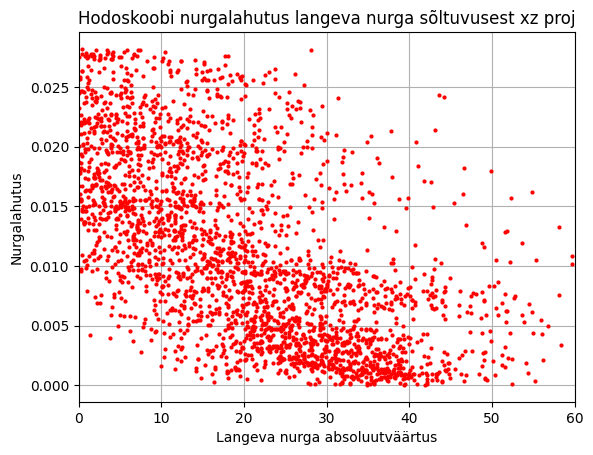

C:\Users\sanna.kruusmaa\AppData\Local\Temp\ipykernel_13728\2395871024.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(vert3_o_2Dy,hodo_angle_val_y, 'b.',marker='.', markersize=4)


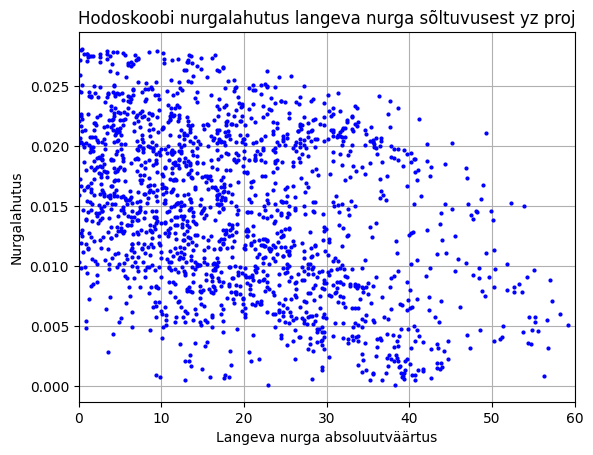

In [9]:
plt.plot(vert3_o_2Dx,hodo_angle_val_x, 'r.',marker='.', markersize=4)
plt.xlim(0,60)
plt.xlabel('Langeva nurga absoluutväärtus')
plt.ylabel('Nurgalahutus')
plt.title('Hodoskoobi nurgalahutus langeva nurga sõltuvusest xz proj')
plt.grid(True)
plt.show()


plt.plot(vert3_o_2Dy,hodo_angle_val_y, 'b.',marker='.', markersize=4)
plt.xlabel('Langeva nurga absoluutväärtus')
plt.xlim(0,60)
plt.ylabel('Nurgalahutus')
plt.title('Hodoskoobi nurgalahutus langeva nurga sõltuvusest yz proj')
plt.grid(True)
plt.show()

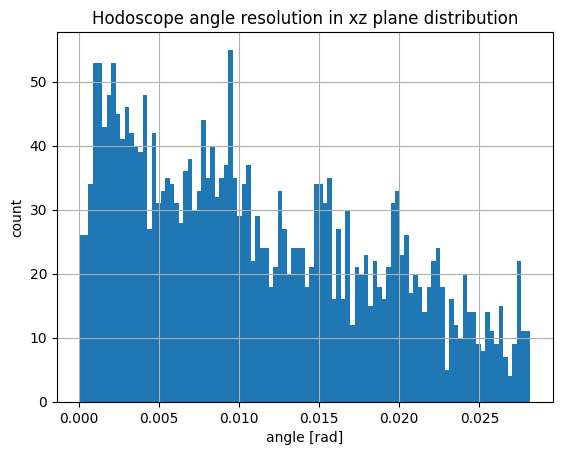

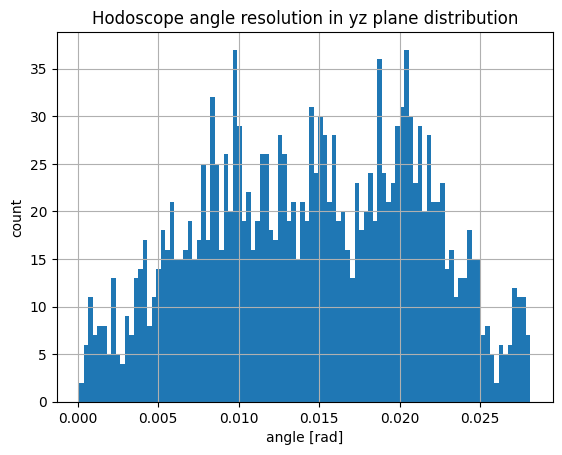

In [7]:
plt.hist(hodo_angle_val_x, bins = 100)
plt.ylabel("count")
plt.xlabel("angle [rad]")
plt.title("Hodoscope angle resolution in xz plane distribution")
plt.grid()
plt.show()

plt.hist(hodo_angle_val_y, bins = 100)
plt.ylabel("count")
plt.xlabel("angle [rad]")
plt.title("Hodoscope angle resolution in yz plane distribution")
plt.grid()
plt.show()

In [ ]:
# plt.plot(x_fibers_val,hodo_angle_val_x, 'r.')
# plt.xlabel('N')
# plt.ylabel('Nurgalahutus')
# plt.title('Hodoskoobi nurgalahutus ergastanud fiibrite arvu järgi x suunas')
# plt.grid(True)
# plt.show()
# print(len(x_fibers_val),len(y_fibers_val))
# plt.plot(y_fibers_val,hodo_angle_val_y, 'b.')
# plt.xlabel('N')
# plt.ylabel('Nurgalahutus')
# plt.title('Hodoskoobi nurgalahutus ergastanud fiibrite arvu järgi y suunas')
# plt.grid(True)
# plt.show()